In [83]:
import warnings

import gvgen
import numpy as np
import pandas as pd
from graphviz import Source

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

In [84]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Outcome"]), df["Outcome"], test_size=test_size, shuffle=True)
X_train['Outcome'] = y_train
X_test['Outcome'] = y_test

print(f'Train Set size: {len(X_train)}')
print(f'Test Set size: {len(X_test)}')
X_train.head()

Train Set size: 614
Test Set size: 154


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
475,0,137,84,27,0,27.3,0.231,59,0
110,3,171,72,33,135,33.3,0.199,24,1
179,5,130,82,0,0,39.1,0.956,37,1
409,1,172,68,49,579,42.4,0.702,28,1
432,1,80,74,11,60,30.0,0.527,22,0


In [86]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.809446,120.762215,69.057003,21.001629,81.221498,32.116612,0.472601,33.135179,0.348534
std,3.368287,31.867468,19.972453,16.005454,115.724330,7.871292,0.324980,11.819039,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.400000,0.244250,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,37.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,33.000000,129.750000,36.775000,0.629750,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
print(f'number of records: {len(X_train.index)}\n')
print('number of missing values in each column:')
print(X_train.isna().sum())

number of records: 614

number of missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


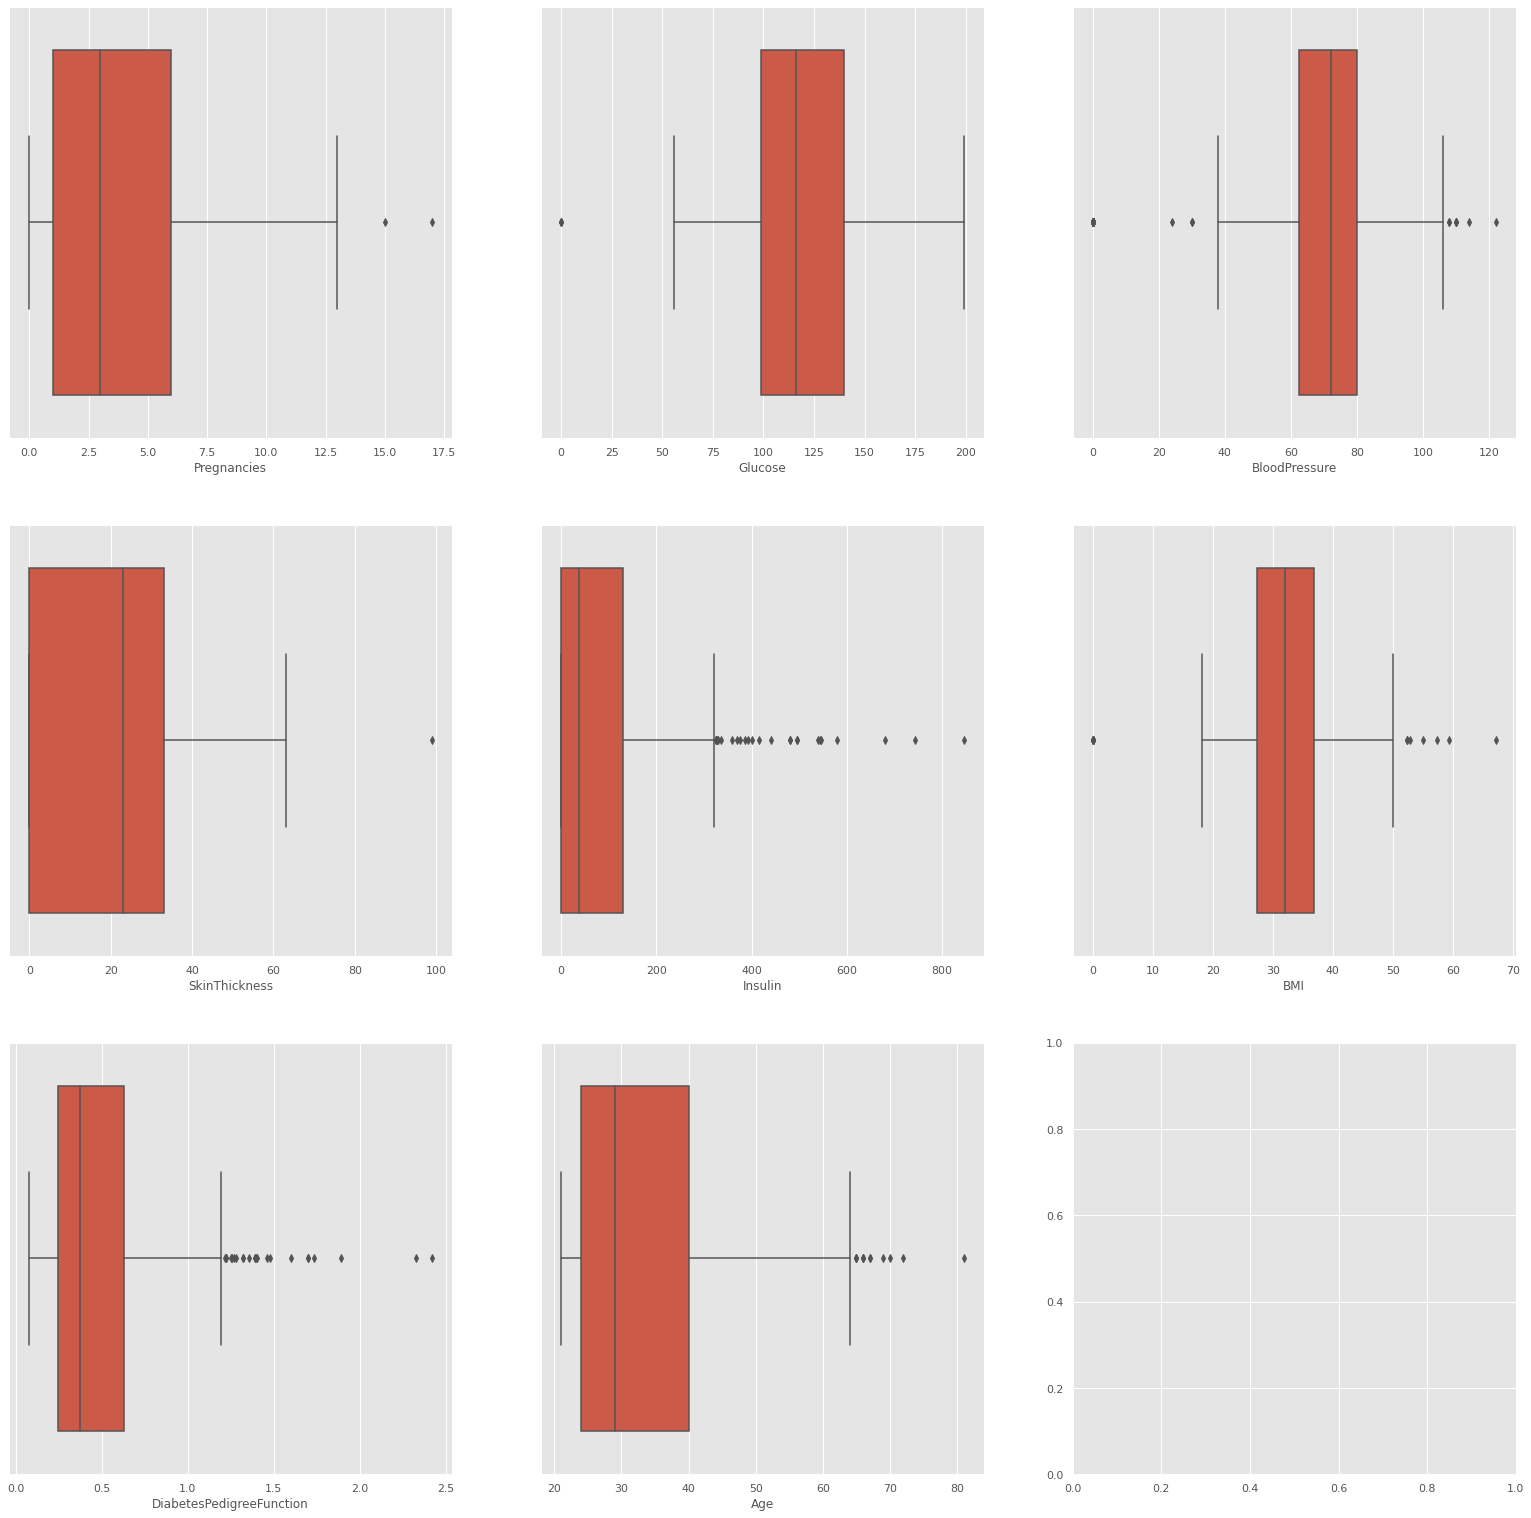

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [88]:
fig1, axes1 = plt.subplots(3, 3, figsize=(27,27))
i = 0
for column in list(X_train.columns)[:-1]:
    plt.figure()
    sns.boxplot(X_train[column], ax=axes1[i//3][i%3])
    i += 1

In [89]:
len(X_train[X_train['BMI'] == 0])

8

In [90]:
def remove_outliers_by_IQR(df, column, lower_coef=1.5, upper_coef=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    df.where(df[[column]] <= q3 + (upper_coef * IQR), inplace=True)
    df.where(df[[column]] >= q1 - (lower_coef * IQR), inplace=True)
    

X_train.where(X_train[list(X_train.columns)] >= 0, inplace=True)

remove_outliers_by_IQR(X_train, 'Pregnancies')
remove_outliers_by_IQR(X_train, 'SkinThickness')
remove_outliers_by_IQR(X_train, 'BMI')
remove_outliers_by_IQR(X_train, 'Glucose')
remove_outliers_by_IQR(X_train, 'DiabetesPedigreeFunction', upper_coef=3)
remove_outliers_by_IQR(X_train, 'Insulin', upper_coef=3)
remove_outliers_by_IQR(X_train, 'BloodPressure', lower_coef=2.2, upper_coef=2.5)

In [91]:
print(f'number of rows: {len(X_train.index)}')
print('\nnumber of nan values per column:')
print(X_train.isna().sum())
X_train.describe()

number of rows: 614

number of nan values per column:
Pregnancies                  2
Glucose                      3
BloodPressure               30
SkinThickness                1
Insulin                      7
BMI                         15
DiabetesPedigreeFunction     3
Age                          0
Outcome                      0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,612.000000,611.000000,584.000000,613.000000,607.000000,599.000000,611.000000,614.000000,614.000000
mean,3.769608,121.355155,72.604452,20.874388,74.782537,32.259265,0.464051,33.135179,0.348534
std,3.300180,30.797007,12.705236,15.704654,98.795680,6.509965,0.301470,11.819039,0.476895
min,0.000000,56.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,36.000000,32.100000,0.370000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,33.000000,125.000000,36.550000,0.626500,40.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,495.000000,50.000000,1.731000,81.000000,1.000000


In [92]:
def fill_missings(x):
    x.fillna(x.median(), inplace=True)

X_train.apply(fill_missings)
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.767101,121.328990,72.574919,20.877850,74.340391,32.255375,0.463591,33.135179,0.348534
std,3.295084,30.723828,12.391128,15.692074,98.316364,6.429870,0.300803,11.819039,0.476895
min,0.000000,56.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.600000,0.244250,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,36.000000,32.100000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,33.000000,125.000000,36.475000,0.625500,40.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,495.000000,50.000000,1.731000,81.000000,1.000000


<AxesSubplot:>

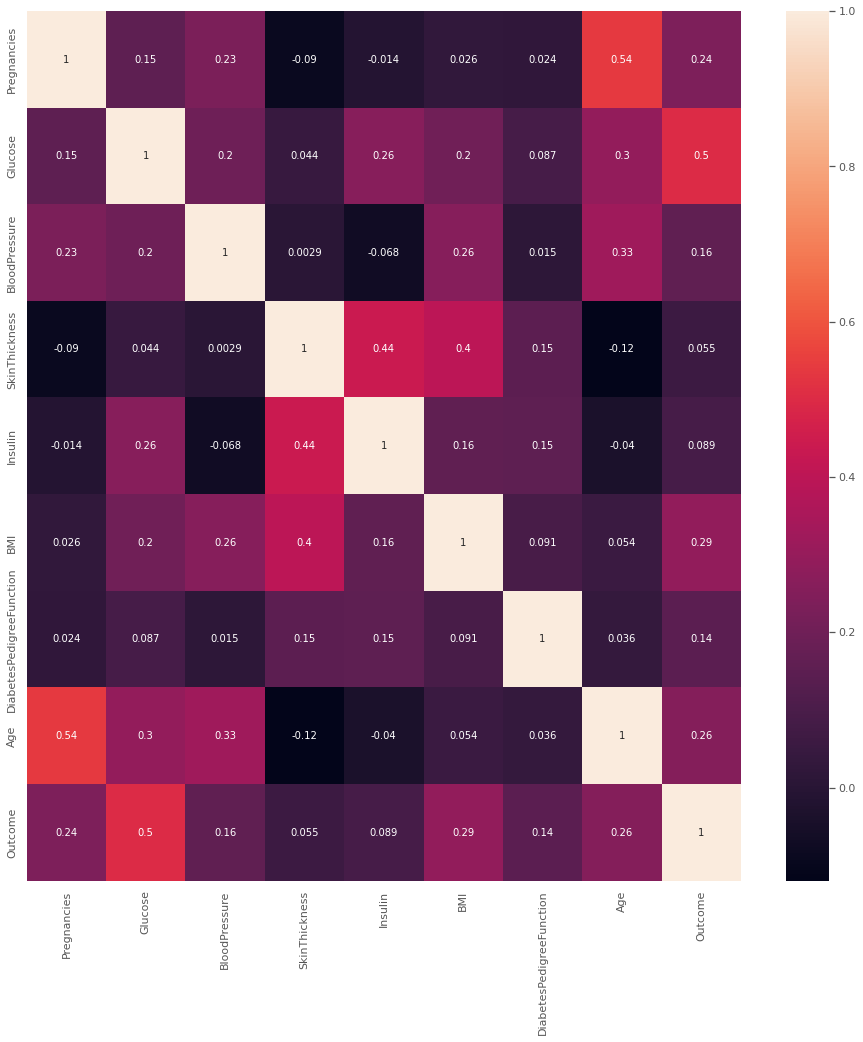

In [93]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(X_train.corr(), annot=True, ax=ax)

In [94]:
def create_bins_boundaries(df, feature, bins_num: int):
    min_val = df[feature].min()
    max_val = df[feature].max()
    step = np.divide(max_val-min_val, bins_num)
    bins = []
    bins.append(-np.inf)
    for i in range(bins_num):
        bins.append(round(min_val + step * i, 3))
    bins.append(round(max_val, 3))
    bins.append(np.inf)
    return bins


def make_feature_discrete(df, feature, bins: list):
    labels = [i for i in range(len(bins)-1)]
    df[feature+'-discrete'] = pd.cut(df[feature], bins, labels=labels)
    

def make_data_discrete(df: pd.DataFrame, test_df: pd.DataFrame):
    for feature in list(df.columns)[:-1]:
        bins = create_bins_boundaries(df, feature, 5)
        make_feature_discrete(df, feature, bins)
        make_feature_discrete(test_df, feature, bins)

In [95]:
original_cols = list(X_train.columns)[:-1]
make_data_discrete(X_train, X_test)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies-discrete,Glucose-discrete,BloodPressure-discrete,SkinThickness-discrete,Insulin-discrete,BMI-discrete,DiabetesPedigreeFunction-discrete,Age-discrete
475,0.0,137.0,84.0,27.0,0.0,27.3,0.231,59,0,0,3,4,3,0,2,1,4
110,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24,1,2,5,3,3,2,3,1,1
179,5.0,130.0,82.0,0.0,0.0,39.1,0.956,37,1,2,3,3,0,0,4,3,2
409,1.0,172.0,68.0,49.0,36.0,42.4,0.702,28,1,1,5,3,4,1,4,2,1
432,1.0,80.0,74.0,11.0,60.0,30.0,0.527,22,0,1,1,3,1,1,2,2,1


In [96]:
new_X_train = X_train.drop(columns=original_cols)
new_X_train.head()

,Outcome,Pregnancies-discrete,Glucose-discrete,BloodPressure-discrete,SkinThickness-discrete,Insulin-discrete,BMI-discrete,DiabetesPedigreeFunction-discrete,Age-discrete
475,0,0,3,4,3,0,2,1,4
110,1,2,5,3,3,2,3,1,1
179,1,2,3,3,0,0,4,3,2
409,1,1,5,3,4,1,4,2,1
432,0,1,1,3,1,1,2,2,1


In [97]:
class Node:
    def __init__(self, entropy):
        self.entropy = entropy


class InteriorNode(Node):
    def __init__(self, attr, entropy, gain, remainder, default):
        super().__init__(entropy)
        self.attribute = attr
        self.entropy = entropy
        self.gain = gain
        self.remainder = remainder
        self.childs = dict()
        self.default = default

    def add_child(self, val, tree):
        self.childs[val] = tree

    def __str__(self):
        return str('<< ' + self.attribute + ' >>\n\n' + 'Entropy = ' + '%.4f' % self.entropy
                   + '\n' + 'Gain = ' + '%.4f' % self.gain
                   + '\n' + 'Remainder = ' + '%.4f' % self.remainder)


class LeafNode(Node):
    def __init__(self, entropy, label):
        super().__init__(entropy)
        self.label = label

    def __str__(self):
        return '<< ' + str(self.label) + ' >>\n\n' + 'Entropy = ' + '%.4f' % self.entropy


class DecisionTreeClassifier:
    def __init__(self, max_depth: int = None):
        self.trained_tree = None
        self.max_depth = max_depth

    def calc_binary_entropy(self, p):
        if p == 0 or p == 1:
            return 0
        return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

    def calc_plurality_value(self, X, y_label):
        p = len(X[X[y_label] == 1])
        n = len(X[X[y_label] == 0])
        entropy = self.calc_binary_entropy(np.divide(p, p + n))
        mode = p if p >= n else n
        return mode, entropy

    def calc_remainder(self, X, feature, y_label):
        vals = X[feature].unique()
        p = len(X[X[y_label] == 1])
        n = len(X[X[y_label] == 0])
        rem = 0.0

        for k in vals:
            pk = len(X[(X[feature] == k) & (X[y_label] == 1)])
            nk = len(X[(X[feature] == k) & (X[y_label] == 0)])
            rem += np.divide(pk + nk, p + n) * self.calc_binary_entropy(np.divide(pk, pk + nk))

        return rem

    def calc_info_gain(self, X, feature, y_label):
        p = len(X[X[y_label] == 1])
        n = len(X[X[y_label] == 0])
        entropy = self.calc_binary_entropy(np.divide(p, p + n))
        remainder = self.calc_remainder(X, feature, y_label)
        return entropy - remainder, remainder

    def select_feature(self, X, features, y_label):
        selected_feature = None
        gain = -np.inf
        remainder = 0

        for feature in features:
            _gain, _remainder = self.calc_info_gain(X, feature, y_label)
            if _gain > gain:
                selected_feature = feature
                gain = _gain
                remainder = _remainder

        return selected_feature, gain, remainder

    @staticmethod
    def check_all_have_same_classification(x):
        a = x.to_numpy()
        return (a[0] == a).all()

    def create_decision_tree(self, X, features, y_label, parent_Xs, depth):
        if X.empty:
            entropy, label = self.calc_plurality_value(parent_Xs, y_label)
            return LeafNode(entropy, label)

        if DecisionTreeClassifier.check_all_have_same_classification(X[y_label]):
            return LeafNode(0, X[y_label].iloc[0])

        if not features or (self.max_depth and depth == self.max_depth):
            entropy, label = self.calc_plurality_value(X, y_label)
            return LeafNode(entropy, label)

        feature, gain, remainder = self.select_feature(X, features, y_label)
        _, label = self.calc_plurality_value(X, y_label)
        root = InteriorNode(feature, gain + remainder, gain, remainder, label)
        vals = X[feature].unique()

        for val in vals:
            new_feats = features.copy()
            new_feats.remove(feature)
            subtree = self.create_decision_tree(X[X[feature] == val], new_feats, y_label, X, depth + 1)
            root.add_child(val, subtree)

        return root

    def fit(self, X, y_label):
        features = list(X.columns)
        features.remove(y_label)
        self.trained_tree = self.create_decision_tree(X, features, y_label, None, 0)

    @staticmethod
    def make_tree_graphviz(graph, tree):
        if isinstance(tree, LeafNode):
            return graph.newItem(tree.__str__())

        if isinstance(tree, InteriorNode):
            item = graph.newItem(tree.__str__())
            for key, val in sorted(tree.childs.items(), key=lambda x: 1 if isinstance(x[1], InteriorNode) else 0):
                child = DecisionTreeClassifier.make_tree_graphviz(graph, val)
                link = graph.newLink(item, child)
                graph.propertyAppend(link, "label", key)
                graph.propertyAppend(link, "color", "red")
            return item

    def show_graphical_decision_tree_result(self):
        g = gvgen.GvGen()
        DecisionTreeClassifier.make_tree_graphviz(g, self.trained_tree)

        with open("graphviz_output.txt", 'w') as f:
            g.dot(f)

        with open("graphviz_output.txt", 'r') as f:
            lines = f.readlines()[1:]

        _str = ''.join(lines)
        src = Source(_str)
        src.render('Decision Tree Result', view=True)
        
    @staticmethod
    def predict_single_sample(sample, tree_node):
        if isinstance(tree_node, LeafNode):
            return tree_node.label

        if isinstance(tree_node, InteriorNode):
            val = sample[tree_node.attribute]
            if val in tree_node.childs:
                return DecisionTreeClassifier.predict_single_sample(sample, tree_node.childs[val])
            else:
                return tree_node.default

        
    def predict(self, test_X):
        result = []
        
        for i in range(len(test_X)):
            result.append(DecisionTreeClassifier.predict_single_sample(test_X.iloc[i], self.trained_tree))
        
        return np.array(result)
            

In [98]:
dtc = DecisionTreeClassifier()
dtc.fit(new_X_train, 'Outcome')
dtc.show_graphical_decision_tree_result()
predicted = dtc.predict(X_test)
original = X_test['Outcome'].to_numpy()

In [99]:
right_guess = 0

for i in range(len(original)):
    if predicted[i] == original[i]:
        right_guess += 1

print(right_guess / len(original) * 100)

57.14285714285714


In [100]:
t_predicted = dtc.predict(new_X_train)
t_original = new_X_train['Outcome'].to_numpy()
t_right_guess = 0

for i in range(len(t_original)):
    if t_predicted[i] == t_original[i]:
        t_right_guess += 1

print(right_guess / len(t_original) * 100)

14.332247557003258


In [3]:
import pandas as pd
rdf = pd.read_csv('restaurant.csv')
rdf[(rdf['Pat'] == 2) & (rdf['Hun'] == 1)]

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Goal
1,1,0,0,1,2,0,0,0,1,2,0
3,1,0,1,1,2,0,1,0,1,1,1
9,1,1,1,1,2,2,0,1,3,1,0
11,1,1,1,1,2,0,0,0,2,2,1


In [3]:
import pandas as pd

def remove_outliers_by_IQR(df, column, lower_coef=1.5, upper_coef=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    df.where(df[[column]] <= q3 + (upper_coef * IQR), inplace=True)
    df.where(df[[column]] >= q1 - (lower_coef * IQR), inplace=True)


def pre_process_data(df: pd.DataFrame):
    df.where(df[list(df.columns)] >= 0, inplace=True)

    remove_outliers_by_IQR(df, 'Pregnancies')
    remove_outliers_by_IQR(df, 'SkinThickness')
    remove_outliers_by_IQR(df, 'BMI')
    remove_outliers_by_IQR(df, 'Glucose')
    remove_outliers_by_IQR(df, 'DiabetesPedigreeFunction', upper_coef=3)
    remove_outliers_by_IQR(df, 'Insulin', upper_coef=3)
    remove_outliers_by_IQR(df, 'BloodPressure', lower_coef=2.2, upper_coef=2.5)

    def fill_missing(x):
        x.fillna(x.mean(), inplace=True)

    df.apply(fill_missing)
    
diabetes_df = pd.read_csv('diabetes.csv')
pre_process_data(diabetes_df)
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.786649,121.686763,72.405184,20.434159,73.384717,32.204005,0.458731,33.240885,0.348958
std,3.270153,30.435949,12.096346,15.698281,98.352356,6.410480,0.295600,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,23.000000,30.500000,32.204005,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,122.000000,36.300000,0.612250,41.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,495.000000,50.000000,1.731000,81.000000,1.000000
